# Processamento Digital de Imagens (PDI)

Processamento Digital de Imagens de Satelites. Analisando imagens do Sentinel - 2, com as bandas B02, B03, B04, B05, B06, B07, B8A, B11 e B12.

In [1]:
#Bibliotecas
import pandas as pd
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt
from spectral import imshow
import os

Carregar as imagens das respectivas bandas estudadas. 

In [2]:
# Listar o caminho das imagens

# Caminho das imagens
path = "/home/wesley/Documentos/ImagensSatelites/MaterialCursoStartPDI/Dados_curso/Imagens_sentinel/Imagem_Bruta/"

# Extraindo o nomes das imagens na pasta de destino
files = [file[2] for file in os.walk(path)]

bandas = []
for file in files[0]:
    if "_B" in file:
        bandas.append(file)
    else:
        pass
#Imagens de interesse selecionadas
bandas

['T22KGV_20210104T132231_B03_20m.jp2',
 'T22KGV_20210104T132231_B05_20m.jp2',
 'T22KGV_20210104T132231_B11_20m.jp2',
 'T22KGV_20210104T132231_B12_20m.jp2',
 'T22KGV_20210104T132231_B8A_20m.jp2',
 'T22KGV_20210104T132231_B02_20m.jp2',
 'T22KGV_20210104T132231_B06_20m.jp2',
 'T22KGV_20210104T132231_B07_20m.jp2',
 'T22KGV_20210104T132231_B04_20m.jp2']

In [3]:
#Lendo as imagens

b02 = Image.open(f"{path}{bandas[5]}")
b03 = Image.open(f"{path}{bandas[0]}")
b04 = Image.open(f"{path}{bandas[8]}")
b05 = Image.open(f"{path}{bandas[1]}")
b06 = Image.open(f"{path}{bandas[6]}")
b07 = Image.open(f"{path}{bandas[4]}")
b8A = Image.open(f"{path}{bandas[5]}") 
b11 = Image.open(f"{path}{bandas[2]}")
b12 = Image.open(f"{path}{bandas[3]}")

In [4]:
# Converter de jp2 para nd array: Array do tipo numpy

b02array = np.array(b02)
b03array = np.array(b03)
b04array = np.array(b04)
b05array = np.array(b05)
b06array = np.array(b06)
b07array = np.array(b07)
b8Aarray = np.array(b8A)
b11array = np.array(b11)
b12array = np.array(b12)

In [5]:
# Verificando os tipos das variáveis

print("Tipo da imagem carregada: ", type(b02), "\n")
print("Tipo da matriz transformada: ", type(b02array), "\n")

# As dimessões da imagem e da matriz devem ser a mesma
# Se a  imagem não for quadrada, as dimessões aparecem de forma invertida
print("Dimenssões da imagem: ", b02.size, "\n")
print("Dimenssões da matriz: ", b02array.shape, "\n")
print("Quantidade de bits: ", b02array.dtype)

Tipo da imagem carregada:  <class 'PIL.Jpeg2KImagePlugin.Jpeg2KImageFile'> 

Tipo da matriz transformada:  <class 'numpy.ndarray'> 

Dimenssões da imagem:  (5490, 5490) 

Dimenssões da matriz:  (5490, 5490) 

Quantidade de bits:  uint16


ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 35620.0]
    G: [0.0, 35620.0]
    B: [0.0, 35620.0]

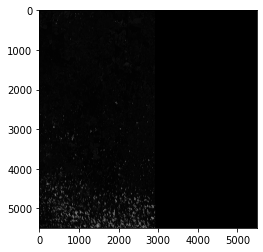

In [58]:
# Aplicando expansão de contraste nas bandas

# imagem original
imshow(b02array)
plt.show()
# expansao de contraste
imshow(b02array, stretch = 0.02)
plt.show()

### Normalizando as bandas

In [6]:
# Verificando a variacao das bandas
print('b02array -> ', np.min(b02array) , ' a ' , np.max(b02array))
print('b05array -> ', np.min(b05array) , ' a ' , np.max(b05array))

b02array ->  0  a  35620
b05array ->  0  a  31988


In [6]:
# Definindo a funcao para normalizar as bandas

def normalization(banda):
    
    return banda/2**(16) 

In [7]:
b02ar_norm = normalization(b02array)
b03ar_norm = normalization(b03array)
b04ar_norm = normalization(b04array)
b05ar_norm = normalization(b05array)
b06ar_norm = normalization(b06array)
b07ar_norm = normalization(b07array)
b8Aar_norm = normalization(b8Aarray)
b11ar_norm = normalization(b11array)
b12ar_norm = normalization(b12array)

### Composição de imagens coloridas 

In [8]:
# Utilizando as bandas b02, b04, b8a
rgb = np.dstack((b8Aar_norm, b02ar_norm, b04ar_norm))
#plt.imshow(rgb)
imshow(rgb)

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.54351806640625]
    G: [0.0, 0.495941162109375]
    B: [0.0, 0.54351806640625]

: 

: 

In [ ]:

# Comprimento de onda das bandas de um determinado pixel
stack     = np.dstack((b2arnorm,b3arnorm,b4arnorm,b5arnorm,b7arnorm)) # empilhamento das bandas
comp_onda = [0.48,0.56,0.65,0.85,2.2] # valores comprimento de onda, em micrometros, das bandas
plt.plot(comp_onda,stack[108,126])
plt.xticks(comp_onda)
plt.xlabel('Comprimento de onda (micrômetros)',fontsize = 14, labelpad = 10)
plt.ylabel('Digital Number',fontsize = 14, labelpad = 10)

In [ ]:

## Aplicação de índices espectrais
# (A - B) / (A + B)

# NDVI
# A = b5; B = b4
ndvi = (b5arnorm - b4arnorm)/(b5arnorm + b4arnorm)
Image.fromarray(ndvi*255.999).show()

# NDWI
# A = b5; B = b3
ndwi = (b5arnorm - b3arnorm)/(b5arnorm + b3arnorm)
imshow(ndwi,stretch = 0.02)